In [2]:
# coding: utf-8
import pandas as pd
import numpy as np
def answer_one():
    energy = pd.read_excel('Energy Indicators.xls',skiprows=[x for x in range(17)],skip_footer=38,usecols=[2,3,4,5],names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])
    energy.replace('...', np.nan,inplace=True)
    energy['Energy Supply'] = energy['Energy Supply']*1000000
    energy['Country'] = energy['Country'].str.replace(r"(\s+\(.*\))|(\d*)","")
    energy.replace("Republic of Korea","South Korea",inplace=True)
    energy.replace("United States of America","United States",inplace=True)
    energy.replace("United Kingdom of Great Britain and Northern Ireland","United Kingdom",inplace=True)
    energy.replace("China, Hong Kong Special Administrative Region","Hong Kong",inplace=True)
    
    GDP = pd.read_csv('world_bank.csv',skiprows=[0,1,2,3])
    GDP.replace("Korea, Rep.","South Korea",inplace=True)
    GDP.replace("Iran, Islamic Rep.","Iran",inplace=True)
    GDP.replace("Hong Kong SAR, China","Hong Kong",inplace=True)
    
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    
    mergeScimEnAndEnergy = pd.merge(ScimEn,energy,how='inner',left_on='Country',right_on='Country')
    merge2 = pd.merge(mergeScimEnAndEnergy,GDP,how='inner',left_on='Country',right_on='Country Name')
    merge2 = merge2[merge2['Rank']<=15]
    merge2.drop(labels=[str(x) for x in range(1960,2007)],axis=1,inplace=True)
    merge2.drop(labels=['Country Code','Indicator Name','Indicator Code'],axis=1,inplace=True)
    merge2.set_index('Country',inplace=True)
    merge2 = merge2[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015','2016','2017']]
    return merge2
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,
China,1,167992,167369,1057626,722578,6.30,176,1.271910e+11,93.0,19.754910,4.598206e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13,1.119099e+13,1.223770e+13
United States,2,126158,123332,1296212,444998,10.27,278,9.083800e+10,286.0,11.570980,1.471858e+13,1.441874e+13,1.496437e+13,1.551793e+13,1.615526e+13,1.669152e+13,1.742761e+13,1.812071e+13,1.862448e+13,1.939060e+13
Japan,3,37948,37612,316956,85620,8.35,155,1.898400e+10,149.0,10.232820,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.850414e+12,4.394978e+12,4.949273e+12,4.872137e+12
United Kingdom,4,28998,28176,335914,64609,11.58,170,7.920000e+09,124.0,10.600470,2.890564e+12,2.382826e+12,2.441173e+12,2.619700e+12,2.662085e+12,2.739819e+12,3.022828e+12,2.885570e+12,2.650850e+12,2.622434e+12
India,5,24872,24300,215787,68150,8.68,141,3.319500e+10,26.0,14.969080,1.186953e+12,1.323940e+12,1.656617e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.039127e+12,2.102391e+12,2.274230e+12,2.597491e+12
Germany,6,24407,23963,231800,48820,9.50,151,1.326100e+10,165.0,17.901530,3.752366e+12,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.890607e+12,3.375611e+12,3.477796e+12,3.677439e+12
Russian Federation,7,23361,23196,55495,22485,2.38,69,3.070900e+10,214.0,17.288680,1.660844e+12,1.222644e+12,1.524916e+12,2.051662e+12,2.210257e+12,2.297128e+12,2.063663e+12,1.368401e+12,1.284728e+12,1.577524e+12
Canada,8,22908,22465,332093,62436,14.50,177,1.043100e+10,296.0,61.945430,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.824289e+12,1.842628e+12,1.799269e+12,1.559623e+12,1.535768e+12,1.653043e+12
France,9,17569,17230,203486,43210,11.58,139,1.059700e+10,166.0,17.020280,2.918383e+12,2.690222e+12,2.642610e+12,2.861408e+12,2.683825e+12,2.811078e+12,2.852166e+12,2.438208e+12,2.465134e+12,2.582501e+12


In [13]:
def answer_two():
    energy = pd.read_excel('Energy Indicators.xls',skiprows=[x for x in range(17)],skip_footer=38,usecols=[2,3,4,5],names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])
    energy.replace('...', np.nan,inplace=True)
    energy['Energy Supply'] = energy['Energy Supply']*1000000
    energy['Country'] = energy['Country'].str.replace(r"(\s+\(.*\))|(\d*)","")
    energy.replace("Republic of Korea","South Korea",inplace=True)
    energy.replace("United States of America","United States",inplace=True)
    energy.replace("United Kingdom of Great Britain and Northern Ireland","United Kingdom",inplace=True)
    energy.replace("China, Hong Kong Special Administrative Region","Hong Kong",inplace=True)
    
    GDP = pd.read_csv('world_bank.csv',skiprows=[0,1,2,3])
    GDP.replace("Korea, Rep.","South Korea",inplace=True)
    GDP.replace("Iran, Islamic Rep.","Iran",inplace=True)
    GDP.replace("Hong Kong SAR, China","Hong Kong",inplace=True)
    
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    
    mergeScimEnAndEnergy = pd.merge(ScimEn,energy,how='outer',left_on='Country',right_on='Country')
    merge2a = pd.merge(mergeScimEnAndEnergy,GDP,how='outer',left_on='Country',right_on='Country Name')
    
    mergeScimEnAndEnergy = pd.merge(ScimEn,energy,how='inner',left_on='Country',right_on='Country')
    merge2b = pd.merge(mergeScimEnAndEnergy,GDP,how='inner',left_on='Country',right_on='Country Name')
    return len(merge2a)-len(merge2b)
answer_two()

157

In [4]:
def answer_three():
    Top15 = answer_one()
    rows = [str(x) for x in range(2008,2017)]
    avg = np.average(Top15[rows],axis=1)
    return pd.Series(avg,index=Top15.index,name='avgGDP').sort_values(ascending=False)
answer_three()

Country
United States         1.629324e+13
China                 8.254126e+12
Japan                 5.297827e+12
Germany               3.598408e+12
France                2.707004e+12
United Kingdom        2.699491e+12
Brazil                2.130901e+12
Italy                 2.113838e+12
India                 1.787852e+12
Russian Federation    1.742694e+12
Canada                1.653775e+12
Spain                 1.395959e+12
Australia             1.295190e+12
South Korea           1.215381e+12
Iran                  4.662549e+11
Name: avgGDP, dtype: float64

In [8]:
def answer_four():
    Top15 = answer_one()
    Top15['avg'] = answer_three()
    Top15.sort_values(by='avg', inplace=True, ascending=False)
    row = Top15.iloc[1]
    g2008 = row['2008']
    g2017 = row['2017']
    return abs(g2017-g2008)
answer_four()

7639494387991.0

In [7]:
def answer_five():
    Top15 = answer_one()
    temp = Top15['Energy Supply per Capita'].values.tolist()
    return sum(temp)/len(temp)
answer_five()


157.6

In [8]:
def answer_six():
    Top15 = answer_one()
    sub = Top15[Top15['% Renewable']==max(Top15['% Renewable'])]
    country = sub.index.values[0]
    percentage = sub['% Renewable'].values[0]
    return (country,percentage)
answer_six()

('Brazil', 69.648030000000006)

In [9]:
def answer_seven():
    Top15 = answer_one()
    ratio = Top15['Self-citations']/Top15['Citations']
    value = max(ratio)
    country = Top15[ratio==max(ratio)].index.values[0]
    return (country,value)
answer_seven()

('China', 0.68320748544381471)

In [10]:
def answer_eight():
    Top15 = answer_one()
    population = Top15['Energy Supply']/Top15['Energy Supply per Capita']
    temp = pd.Series(population,index=Top15.index,name='population').sort_values()
    return temp.index.values[-3]
answer_eight()

'United States'

In [11]:
def answer_nine():
    Top15 = answer_one()
    newColumn = Top15['Citable documents']/(Top15['Energy Supply'] / Top15['Energy Supply per Capita'])
    return Top15['Energy Supply per Capita'].corr(newColumn)
answer_nine()

0.77404323399911701

In [12]:
def plot9():
    import matplotlib as plt
    Top15 = answer_one()
    Top15['Pop'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['Pop']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

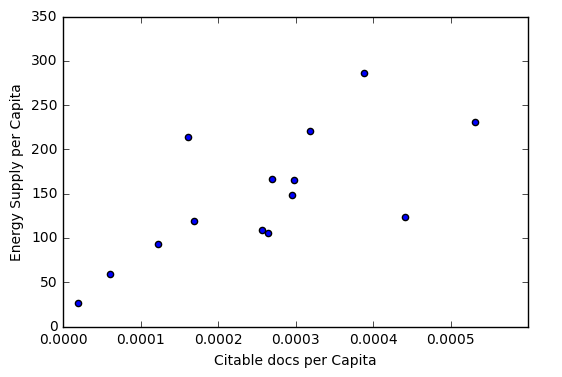

In [13]:
plot9()

In [14]:
def answer_ten():
    Top15 = answer_one().sort_values(by='Rank')
    theColumn = Top15['% Renewable'].values
    medianValue = np.median(theColumn)
    mask1 = theColumn>=medianValue
    mask2 = theColumn<medianValue
    theColumn[mask1] = 1
    theColumn[mask2] = 0
    return pd.Series(theColumn,index=Top15.index,name='HighRenew')
answer_ten()

Country
China                 1.0
United States         0.0
Japan                 0.0
United Kingdom        0.0
India                 0.0
Germany               1.0
Russian Federation    1.0
Canada                1.0
France                1.0
South Korea           0.0
Italy                 1.0
Iran                  0.0
Brazil                1.0
Australia             0.0
Spain                 1.0
Name: HighRenew, dtype: float64

In [15]:
def answer_eleven():
    Top15 = answer_one()
    Top15['pop'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}
    index = []
    item = []
    for group,frame in Top15.groupby(ContinentDict):
        index.append(group)
        item.append({'size':len(frame),'sum':np.sum(frame['pop']),'mean':np.average(frame['pop']),'std':np.std(frame['pop'])})
    return pd.DataFrame(item,index=index)
answer_eleven()

,mean,size,std,sum
Asia,5.797333e+08,5,6.074036e+08,2.898666e+09
Australia,2.331602e+07,1,0.000000e+00,2.331602e+07
Europe,7.632161e+07,6,3.162885e+07,4.579297e+08
North America,1.764276e+08,2,1.411878e+08,3.528552e+08
South America,2.059153e+08,1,0.000000e+00,2.059153e+08


In [16]:
def answer_twelve():
    Top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}
    Top15 = Top15.reset_index()
    Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
    Top15['bins'] = pd.cut(Top15['% Renewable'],5)
    return Top15.groupby(['Continent','bins']).size()
answer_twelve()

Continent      bins            
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

In [17]:
def answer_thirteen():
    Top15 = answer_one()
    pop = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    index = pop.index.values
    value = []
    for x in pop.values.tolist():
        value.append("{:,}".format(x))
    return pd.Series(value,index=index,name='PopEst')
answer_thirteen()

China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
India                 1,276,730,769.2307692
Germany                 80,369,696.96969697
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Iran                    77,075,630.25210084
Brazil                 205,915,254.23728815
Australia              23,316,017.316017315
Spain                    46,443,396.2264151
Name: PopEst, dtype: object

In [16]:
def plot_optional():
    import matplotlib as plt
    get_ipython().magic('matplotlib inline')
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2017']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.")


This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


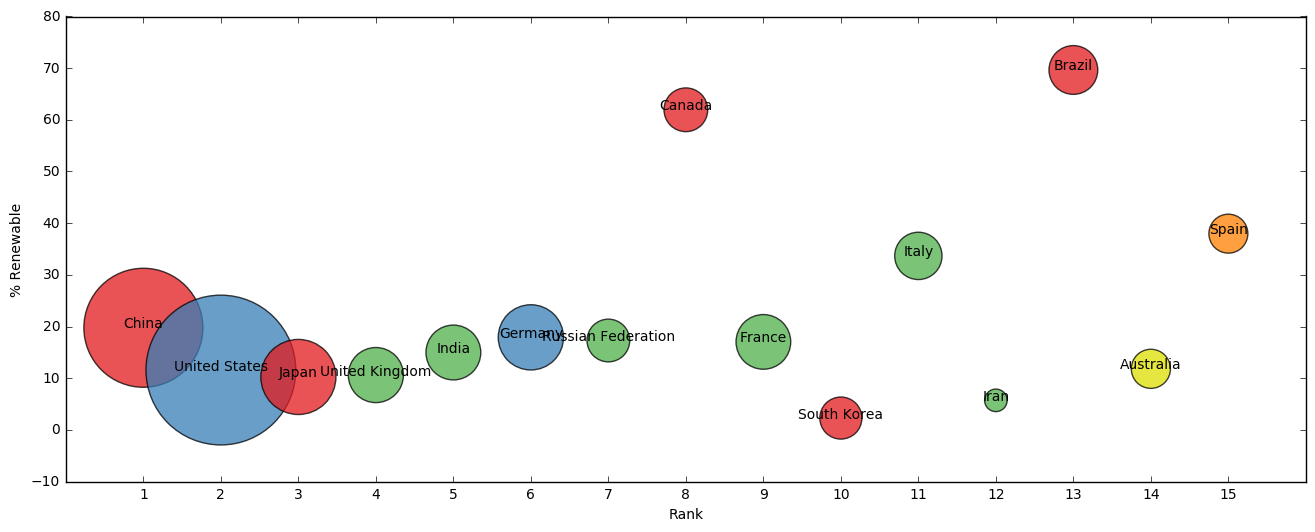

In [17]:
plot_optional()

In [11]:
def plot_optionl():
    import matplotlib as plt
    get_ipython().magic('matplotlib inline')
    Top15 = answer_one()
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}
    Top15 = Top15.reset_index()
    Top15['Continent'] = [ContinentDict[country] for country in Top15['Country']]
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.")


This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


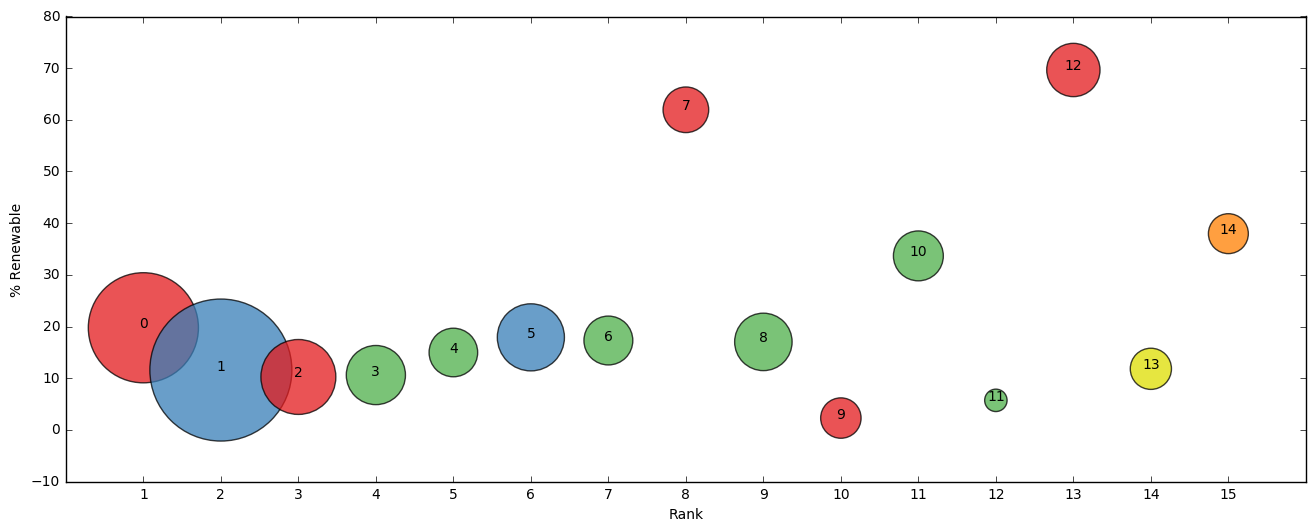

In [12]:
plot_optionl()